# 5. Network Construction and Visualization

graphs and networks

options in python and beyond

why networkx ... open a browser window https://networkx.org/documentation/stable/reference/index.html to ...

Four construction types

Network drawing: goal to visualize much information (Krempel book)

...

**Python textbooks using networkx**

Caldarelli & Chessa 2016. Data Science and Complex Networks: Real Case Studies with Python. https://doi.org/10.1093/acprof:oso/9780199639601.001.0001. Code: https://github.com/datascienceandcomplexnetworks.

Platt 2019. Network Science with Python and NetworkX Quick Start Guide. https://www.packtpub.com/product/network-science-with-python-and-networkx-quick-start-guide/9781789955316. Code: https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide.

Menczer et al. 2020. A First Course in Network Science. https://doi.org/10.1017/9781108653947. Code: https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/.

Ma & Seth 2022. Network Analysis Made Simple. https://leanpub.com/nams. Code: https://ericmjl.github.io/Network-Analysis-Made-Simple/.

...

**Other textbooks**

Newman FOR ERRORS

Barabasi

Wasserman & Faust

Zweig

Borgatti & Everett

...

In [1]:
## nodelists and edgelists
### attributes
#nx.from_pandas_edgelist()
#g.nodes()
#g.edges()
#g.number_of_nodes()
#g.number_of_edges()
#
## copenhagen network data
#
## 1 static
#
## plotting
## spring embedding
### connected components
#nx.is_connected()
#
## 2 discrete dynamic
### slice by timestamp (sekara paper)
### slice by degree
#
## 3 multilayer
### from variable
### from data via clustering (node2vec?)
#nx.MultiGraph()
#
## 4 multimodal
### tweetskb
### 2-partite
### k-partite
### pandas to scipy
#
## import/export

TODO: LINK CLASSES TO NETWORKX WEBSITE

## 5.1. Static networks

...

### 5.1.1. Constructing from scratch

In [2]:
import networkx as nx

In [3]:
# Nodes can be added either node by node ...
G = nx.Graph()
G.add_node('Peter')
G.add_node('Paul')
G.add_node('Mary')
G.nodes()

NodeView(('Peter', 'Paul', 'Mary'))

In [4]:
# or they can be added at once
G = nx.Graph()
G.add_nodes_from(['Peter', 'Paul', 'Mary'])
G.nodes()

NodeView(('Peter', 'Paul', 'Mary'))

In [5]:
# Similarly, edges can be added edge by edge ...
G.add_edge('Peter', 'Paul')
G.add_edge('Peter', 'Mary')
G.add_edge('Paul', 'Mary')
G.edges()

EdgeView([('Peter', 'Paul'), ('Peter', 'Mary'), ('Paul', 'Mary')])

In [6]:
# or all at once
G.add_edges_from([['Peter', 'Paul'], ['Peter', 'Mary'], ['Paul', 'Mary']])
G.edges()

EdgeView([('Peter', 'Paul'), ('Peter', 'Mary'), ('Paul', 'Mary')])

In [7]:
#nx.Graph({'Peter': ('Paul', 'Mary'), 'Paul': 'Mary'})

### 5.1.2. Constructing from Pandas dataframes

In [8]:
import pandas as pd

In [9]:
# Suppose we have a list of nodes with attributes
nodelist = pd.DataFrame([['Peter', 100, 'red'], ['Paul', 300, 'green'], ['Mary', 500, 'blue']], columns=['name', 'size', 'color'])
#nodelist = pd.DataFrame(['Peter', 'Paul', 'Mary'], columns=['name'])
nodelist

,name,size,color
0,Peter,100,red
1,Paul,300,green
2,Mary,500,blue


In [10]:
# Add nodes from list
G = nx.Graph()
G.add_nodes_from(nodelist['name'].tolist())
#G.add_nodes_from(nodelist.index.tolist())
G.nodes()

NodeView(('Peter', 'Paul', 'Mary'))

In [11]:
# Suppose we also have a list of edges with attributes
edgelist = pd.DataFrame([['Peter', 'Paul', 1, 'red', 'solid'], ['Peter', 'Mary', 2, 'red', 'solid'], ['Paul', 'Mary', 3, 'green', 'dashed']], columns=['source', 'target', 'weight', 'color', 'style'])
edgelist

,source,target,weight,color,style
0,Peter,Paul,1,red,solid
1,Peter,Mary,2,red,solid
2,Paul,Mary,3,green,dashed


In [12]:
# Add edges from list
#G = nx.from_pandas_edgelist(df=edgelist, source='source', target='target', edge_attr=['width', 'color'])
G = nx.from_pandas_edgelist(df=edgelist, source='source', target='target')
G.edges()

EdgeView([('Peter', 'Paul'), ('Peter', 'Mary'), ('Paul', 'Mary')])

In [13]:
# Some users may store their networks as adjacency matrices
matrix = pd.DataFrame([[0, 1, 2], [0, 0, 3], [0, 0, 0]], index=['Peter', 'Paul', 'Mary'], columns=['Peter', 'Paul', 'Mary'])
matrix

,Peter,Paul,Mary
Peter,0,1,2
Paul,0,0,3
Mary,0,0,0


In [14]:
# Add edges from adjacency matrix
G = nx.Graph()
G = nx.from_pandas_adjacency(matrix)
G.edges(data=True)

EdgeDataView([('Peter', 'Paul', {'weight': 1}), ('Peter', 'Mary', {'weight': 2}), ('Paul', 'Mary', {'weight': 3})])

Note that `from_pandas_adjacency()` directly adds edge weights stored in the cells of the adjacency matrix. To utilize them for network drawing, they must be transformed into a list:

In [15]:
edge_weight = list(nx.get_edge_attributes(G, 'weight').values())

This list is then called in the `draw()` function:

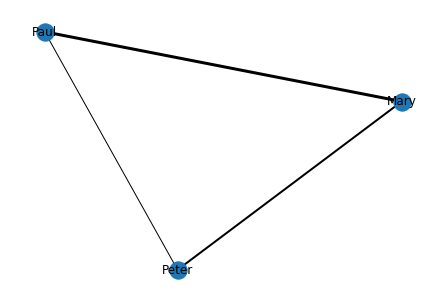

In [16]:
nx.draw(G=G, with_labels=True, width=edge_weight)

### 5.1.3. Internalizing attributes
While it is nice that edge weights can be stored in the adjacency matrix and easily added to the graph, the matrix format wates memory because -- other than in the edgelist -- zeros are also stored. The matrix format can also store only one edge attribute whereas the edgelist can store as many as you want. In fact, edge weights do not have to be internalized in the graph object. Here, we call all node and edge attributes from the node and edge lists:

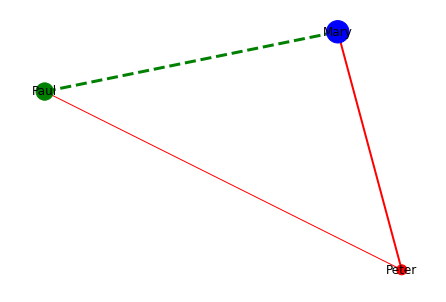

In [17]:
nx.draw(
    G=G, 
    with_labels=True, 
    node_size=nodelist['size'], 
    node_color=nodelist['color'], 
    width=edgelist['weight'], 
    edge_color=edgelist['color'], 
    style=edgelist['style']
)

Still, it might be a good idea to internalize attributes -- to store them in the graph object. For example, you may prefer to keep track of just one object and not an additional object for each attribute. Or you may want to store graph and attributes in a pickle file to use transfer a preprocessed graph to another notebook.

In [18]:
# Add edges with attributes from edgelist
G = nx.Graph()
G = nx.from_pandas_edgelist(df=edgelist, source='source', target='target', edge_attr=['weight', 'color'])
G.edges(data=True)

EdgeDataView([('Peter', 'Paul', {'weight': 1, 'color': 'red'}), ('Peter', 'Mary', {'weight': 2, 'color': 'red'}), ('Paul', 'Mary', {'weight': 3, 'color': 'green'})])

Once you have read an edge list and internalized the edge attributes, you can still add more attributes. However, this is relatively complicated, it requires some extra steps that are nest put into a function:

In [19]:
# Add additional edge attribute (style)
def get_edge_attr_values(df, edge_attr, source='source', target='target'):
    '''
        Bla
    '''
    df = pd.DataFrame([edgelist[[edge_attr]].to_dict('records')]).T
    df.index = list(zip(edgelist[source], edgelist[target]))
    return list(df.to_dict().values())[0]
style = get_edge_attr_values(edgelist, 'style')
style

{('Peter', 'Paul'): {'style': 'solid'},
 ('Peter', 'Mary'): {'style': 'solid'},
 ('Paul', 'Mary'): {'style': 'dashed'}}

The additional edge attributes created with the `get_edge_attr_values()` function can then be internalized:

In [20]:
nx.set_edge_attributes(G, style)

In [21]:
G.edges(data=True)

EdgeDataView([('Peter', 'Paul', {'weight': 1, 'color': 'red', 'style': 'solid'}), ('Peter', 'Mary', {'weight': 2, 'color': 'red', 'style': 'solid'}), ('Paul', 'Mary', {'weight': 3, 'color': 'green', 'style': 'dashed'})])

For node attributes there is no function that directly adds them from the nodelist. We have to write our own little function `get_node_attr_values()` to take node attributes from the nodelist and store them in a way that NetworkX needs. The function works attribute by attribute:

In [22]:
# Internalize node attributes
def get_node_attr_values(df, node, node_attr):
    '''
        Bla
    '''
    return dict(zip(df[node], df[node_attr]))
size = get_node_attr_values(nodelist, 'name', 'size')
color = get_node_attr_values(nodelist, 'name', 'color')

In [23]:
nx.set_node_attributes(G, size, 'size')
nx.set_node_attributes(G, color, 'color')

In [24]:
G.nodes(data=True)

NodeDataView({'Peter': {'size': 100, 'color': 'red'}, 'Paul': {'size': 300, 'color': 'green'}, 'Mary': {'size': 500, 'color': 'blue'}})

Finally, we can also add an attribute to the network itself, usually just a description:

In [25]:
G.graph['name'] = 'Toy example'
G.graph

{'name': 'Toy example'}

### 5.1.4. Drawing networks with internal attributes
To draw the network with all the internalized attributes (all but the graph attribute), we must transform them to lists:

In [26]:
# Transform internal attributes back into lists that can be used for network drawing
node_size = list(nx.get_node_attributes(G, 'size').values())
node_color = list(nx.get_node_attributes(G, 'color').values())
edge_weight = list(nx.get_edge_attributes(G, 'weight').values())
edge_color = list(nx.get_edge_attributes(G, 'color').values())
edge_style = list(nx.get_edge_attributes(G, 'style').values())

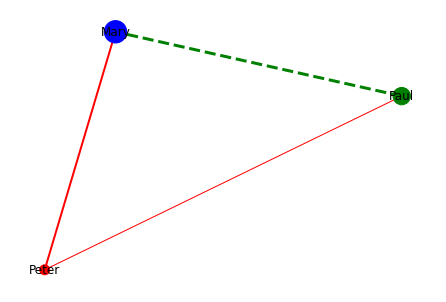

In [27]:
nx.draw(
    G=G, 
    with_labels=True, 
    node_size=node_size, 
    node_color=node_color, 
    width=edge_weight, 
    edge_color=edge_color, 
    style=edge_style
)

To repeatedly draw the same graph with the same node positions, it is useful to also internalize those:

In [28]:
pos = nx.circular_layout(G)

In [29]:
nx.set_node_attributes(G, pos, 'pos')

In [30]:
node_pos = nx.get_node_attributes(G, 'pos')

Note that the input for the `pos` parameter in the `draw()` function must be a dictionary, not as list as for most other parameters:

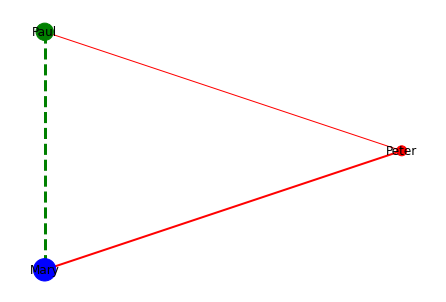

In [31]:
nx.draw(
    G=G, 
    pos=node_pos, 
    with_labels=True, 
    node_size=node_size, 
    node_color=node_color, 
    width=edge_weight, 
    edge_color=edge_color, 
    style=edge_style
)

### 5.1.5. Directed networks

...

<div class='alert-info'>
<big><b>Nodes as labels or integers?</b></big>

NetworkX can handle any definition of nodes, whether they are strings, integers, or even both. This makes NetworkX easier to use. But you may still want to use integers $\{0, 1, ..., N\}$ to specify your nodes in a more formal way where $N$ is the number of nodes. If you want that, you can use the index of your nodelist as node labels and use those integers in the edgelist. More information is [here](https://networkx.org/documentation/stable/tutorial.html#what-to-use-as-nodes-and-edges).
</div>

### 5.1.6. The Copenhagen Networks Study interaction data
On the data ...

https://doi.org/10.1038/s41597-019-0325-x

https://doi.org/10.6084/m9.figshare.11283407

Load data from figshare into the `data/cns/` folder.

The Copenhagen_Networks_Study_Notebook demonstrated how to load the data and do some visualizations...

In [32]:
nodelist_cns = pd.read_csv('../data/cns/genders.csv')
nodelist_cns

,# user,female
0,0,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
782,840,0
783,841,1
784,845,0
785,846,0


The nodelist contains 787 rows, and the largest user number is 847, so we use user numbers as labels in the standard NetworkX way:

In [33]:
G_cns = nx.Graph()
G_cns.add_nodes_from(nodelist_cns['# user'].tolist())
female = get_node_attr_values(nodelist_cns, '# user', 'female')
nx.set_node_attributes(G_cns, female, 'female')
G_cns.nodes(data=True)

NodeDataView({0: {'female': 0}, 2: {'female': 0}, 3: {'female': 0}, 4: {'female': 0}, 5: {'female': 0}, 6: {'female': 1}, 7: {'female': 1}, 8: {'female': 0}, 9: {'female': 0}, 10: {'female': 0}, 11: {'female': 0}, 12: {'female': 0}, 13: {'female': 0}, 14: {'female': 0}, 15: {'female': 0}, 16: {'female': 0}, 17: {'female': 0}, 18: {'female': 0}, 19: {'female': 0}, 20: {'female': 0}, 21: {'female': 1}, 22: {'female': 0}, 23: {'female': 0}, 24: {'female': 0}, 25: {'female': 0}, 27: {'female': 0}, 28: {'female': 0}, 29: {'female': 0}, 30: {'female': 0}, 32: {'female': 1}, 33: {'female': 0}, 34: {'female': 0}, 35: {'female': 0}, 36: {'female': 1}, 37: {'female': 0}, 38: {'female': 0}, 39: {'female': 0}, 40: {'female': 0}, 41: {'female': 1}, 42: {'female': 0}, 43: {'female': 0}, 44: {'female': 0}, 45: {'female': 0}, 46: {'female': 1}, 47: {'female': 0}, 48: {'female': 1}, 49: {'female': 0}, 50: {'female': 0}, 51: {'female': 1}, 52: {'female': 0}, 53: {'female': 1}, 54: {'female': 1}, 55: {'f

We start with the Facebook friendship relationships because the resulting graph is simple (i.e., undirected and unweighted):

In [34]:
edgelist_cns_fb = pd.read_csv('../data/cns/fb_friends.csv')
edgelist_cns_fb

,# user_a,user_b
0,0,512
1,0,263
2,0,525
3,0,285
4,0,543
...,...,...
6424,510,737
6425,510,763
6426,255,566
6427,255,605


In [35]:
print(open('../data/cns/fb_friends.README', 'r').read())

column names:
	- user A
	- user B

Edge lists of all declared facebook friendships which were formed before the end of the observation and not dissolved until after the end of the observation.



In [36]:
# TALK ABOUT INHERITANCE OF CHANGES
G_cns_fb = G_cns.copy()

In [37]:
G_cns_fb = nx.from_pandas_edgelist(df=edgelist_cns_fb, source='# user_a', target='user_b')
G_cns_fb.edges()

EdgeView([(0, 512), (0, 263), (0, 525), (0, 285), (0, 543), (0, 806), (0, 817), (0, 824), (0, 341), (0, 600), (0, 104), (0, 107), (0, 108), (0, 371), (0, 632), (0, 687), (0, 208), (0, 744), (0, 491), (512, 790), (512, 538), (512, 809), (512, 560), (512, 820), (512, 580), (512, 839), (512, 631), (512, 690), (512, 700), (512, 728), (512, 263), (512, 273), (512, 36), (512, 37), (512, 296), (512, 297), (512, 299), (512, 46), (512, 55), (512, 320), (512, 69), (512, 79), (512, 81), (512, 338), (512, 83), (512, 352), (512, 355), (512, 370), (512, 374), (512, 133), (512, 135), (512, 140), (512, 400), (512, 151), (512, 426), (512, 177), (512, 441), (512, 201), (512, 457), (512, 464), (512, 211), (512, 484), (512, 237), (263, 262), (263, 283), (263, 797), (263, 286), (263, 288), (263, 297), (263, 299), (263, 300), (263, 817), (263, 820), (263, 824), (263, 578), (263, 324), (263, 580), (263, 338), (263, 340), (263, 342), (263, 598), (263, 352), (263, 611), (263, 356), (263, 372), (263, 374), (263

### 5.1.7. Layouting networks

...

adjust window size using matplotlib

CHECK IF NODES AND FEMALE ATTRIBUTES MATCH

...

FIX VERSION CONFLICT:

In [38]:
#nx.draw(G_cns_fb)

## 5.2. Network snapshots from link streams

Link streams are ... can originate in ...

Exogenous time vs. endogenous time ...

...

### 5.2.1. Aggregating edges by clock

Sekara paper: https://doi.org/10.1073/pnas.1602803113

...

In [39]:
edgelist_cns_bt = pd.read_csv('../data/cns/bt_symmetric.csv')
edgelist_cns_bt

,# timestamp,user_a,user_b,rssi
0,0,0,-1,0
1,0,1,-1,0
2,0,2,-1,0
3,0,3,-2,-88
4,0,5,-1,0
...,...,...,...,...
5474284,2418900,702,371,-79
5474285,2418900,703,-1,0
5474286,2418900,704,-1,0
5474287,2418900,705,-2,-90


In [40]:
print(open('../data/cns/bt_symmetric.README', 'r').read())

column names:
	- timestamp
	- user A 
	- user B 
	- received signal strength

Notes:
Empty scans are marked with user B = -1 and RSSI = 0
Scans of devices outside of the experiment are marked with user B = -2. All non-experiment devices are given the same ID.



How Bluetooth works ... scans ... experiment devides ... RSSI ...

The Sekara paper reports (OR DOES IT REPORT THAT THESE ARE SECONDS IN % MINUTE INTERVALS?) that Bluetooth searches were performed every five minutes. By transforming `# timestamp` into a categorical variable, we see that time is measured in seconds. ...

4 weeks consist of 8,064 intervals of 5 minutes.

In [41]:
# '# timestamp'
edgelist_cns_bt['# timestamp'].astype('category').cat.categories

Int64Index([      0,     300,     600,     900,    1200,    1500,    1800,
               2100,    2400,    2700,
            ...
            2416200, 2416500, 2416800, 2417100, 2417400, 2417700, 2418000,
            2418300, 2418600, 2418900],
           dtype='int64', length=8064)

In [42]:
# Transform `rssi` into signal strength between 0 and 8063
edgelist_cns_bt['# timestamp'] = edgelist_cns_bt['# timestamp'].astype('category').cat.codes
edgelist_cns_bt.rename(columns={'# timestamp': 'time'}, inplace=True)
edgelist_cns_bt['time'].max()

8063

In [43]:
# Remove (non-experiment devides) & (four errors)
edgelist_cns_bt = edgelist_cns_bt[(edgelist_cns_bt['user_b'] >= 0) & (edgelist_cns_bt['rssi'] < 0)].reset_index(drop=True)

In [44]:
# Transform `rssi` into signal strength between 0 and 92
edgelist_cns_bt['rssi'] = edgelist_cns_bt['rssi']+100
edgelist_cns_bt.rename(columns={'rssi': 'strength'}, inplace=True)
edgelist_cns_bt['strength'].max()

92

In [45]:
edgelist_cns_bt

,time,user_a,user_b,strength
0,0,21,20,27
1,0,47,19,14
2,0,49,48,38
3,0,69,44,13
4,0,90,64,4
...,...,...,...,...
2426270,8063,702,194,17
2426271,8063,702,259,42
2426272,8063,702,294,6
2426273,8063,702,359,6


<AxesSubplot:>

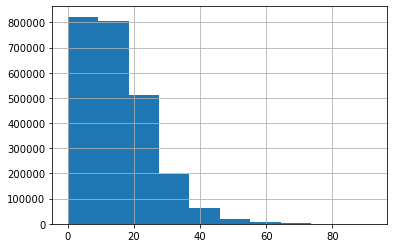

In [46]:
edgelist_cns_bt['strength'].hist()

In [47]:
# Construct networks just from edgelist (i.e., isolated persons will be missing)
def aggregate_edges(df, time, source, target, weight, time_zero, time_window, fun, directed=False):
    '''
        Bla
    '''
    if weight == None:
        weight = 'weight'
        df[weight] = 1
    if fun == 'max':
        df_agg = df[df[time].between(time_zero, time_zero+time_window-1)].groupby([source, target]).max().reset_index()[[source, target, weight]]
    if fun == 'sum':
        df_agg = df[df[time].between(time_zero, time_zero+time_window-1)].groupby([source, target]).sum().reset_index()[[source, target, weight]]
    if directed == False:
        graph_type = nx.Graph
    else:
        graph_type = nx.DiGraph
    G_agg = nx.from_pandas_edgelist(
        df=df_agg, 
        source=source, 
        target=target, 
        edge_attr=weight, 
        create_using=graph_type
    )
    return df_agg, G_agg

In [48]:
import matplotlib.pyplot as plt

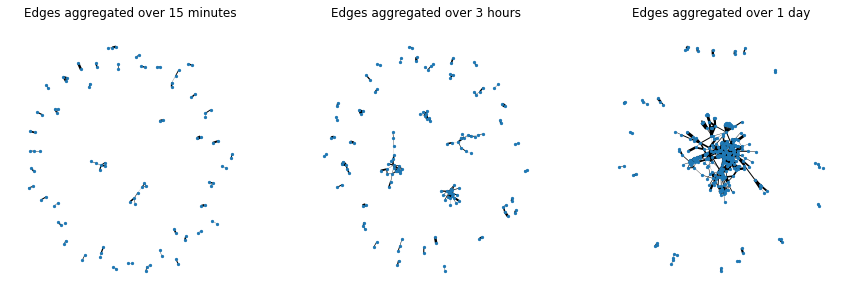

In [49]:
time_zero = 0
time_windows = [3, 36, 288]
window_labels = ['15 minutes', '3 hours', '1 day']

fig, axs = plt.subplots(1, len(time_windows), figsize=(15, 5))
for i in range(len(time_windows)):
    _, G_agg = aggregate_edges(
        df=edgelist_cns_bt, 
        time='time', 
        source='user_a', 
        target='user_b', 
        weight='strength', 
        time_zero=time_zero, 
        time_window=time_windows[i], 
        fun='max'
    )
    axs[i].set_title('Edges aggregated over '+window_labels[i])
    nx.draw(
        G=G_agg, 
        ax=axs[i], 
        node_size=5, 
        width=[strength/20. for strength in list(nx.get_edge_attributes(G_agg, 'strength').values())]
    )

INTERPRET ABOVE RESULT IN LIGHT OF SEKARA PAPER

28 1-day snapshots:

In [50]:
#time_zero = 0
#time_window = 288
#l_df_cns_bt = []
#l_G_cns_bt = []
#
##fig, axs = plt.subplots(4, 7, figsize=(14, 8))
#for i in range(28):
#    df_agg, G_agg = aggregate_edges(
#        df=edgelist_cns_bt, 
#        time='time', 
#        source='user_a', 
#        target='user_b', 
#        weight='strength', 
#        time_zero=time_zero, 
#        time_window=time_window, 
#        fun='max'
#    )
#    l_df_cns_bt.append(df_agg)
#    l_G_cns_bt.append(G_agg)
#    time_zero += time_window
#    #axs[i].set_title('Edges aggregated for day '+str(i))
#    nx.draw(
#        G=G_agg, 
#        #ax=axs[i], 
#        node_size=5, 
#        width=[strength/20. for strength in list(nx.get_edge_attributes(G_agg, 'strength').values())]
#    )

### 5.2.2. Aggregating edges by connectivity

...

In [51]:
#k_threshold = 10.
#time_zero = 0
#l_df_cns_bt = []
#l_G_cns_bt = []
#
#while time_zero < edgelist_cns_bt['time'].max():
#    print(time_zero)
#    k_mean = 0.
#    time_window = 1
#    while k_mean < k_threshold:
#        #print(time_window)
#        df_agg, G_agg = aggregate_edges(
#            df=edgelist_cns_bt, 
#            time='time', 
#            source='user_a', 
#            target='user_b', 
#            weight='strength', 
#            time_zero=time_zero, 
#            time_window=time_window, 
#            fun='max'
#        )
#        k_mean = sum(dict(dict(G_agg.degree())).values())/G_agg.number_of_nodes()
#        time_window += 1
#        if time_zero + time_window > edgelist_cns_bt['time'].max(): break
#    l_df_cns_bt.append(df_agg)
#    l_G_cns_bt.append(G_agg)
#    time_zero += time_window

Giant connected components in the first day:

In [52]:
time_zero = 0
l_df_cns_bt = []
l_G_cns_bt = []

while time_zero < 288: # edgelist_cns_bt['time'].max()
    #print(time_zero)
    P = 0.
    time_window = 1
    while P < .5:
        #print(time_window)
        df_agg, G_agg = aggregate_edges(
            df=edgelist_cns_bt, 
            time='time', 
            source='user_a', 
            target='user_b', 
            weight='strength', 
            time_zero=time_zero, 
            time_window=time_window, 
            fun='max'
        )
        P = G_agg.subgraph(sorted(nx.connected_components(G_agg), key=len, reverse=True)[0]).number_of_nodes()/G_agg.number_of_nodes()
        time_window += 1
        if time_zero + time_window > edgelist_cns_bt['time'].max(): break
    l_df_cns_bt.append(df_agg)
    l_G_cns_bt.append(G_agg)
    time_zero += time_window

In [53]:
len(l_G_cns_bt)

4

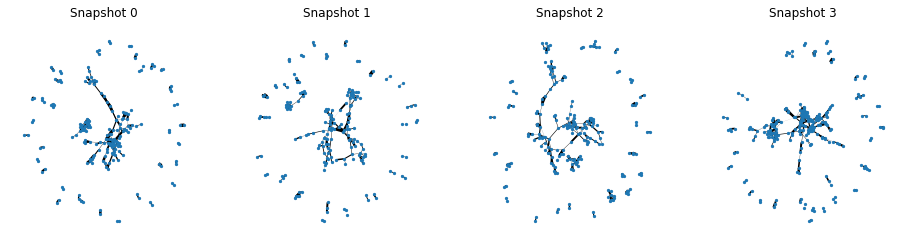

In [54]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
    axs[i].set_title('Snapshot '+str(i))
    nx.draw(
        G=l_G_cns_bt[i], 
        ax=axs[i], 
        node_size=5, 
        width=[strength/20. for strength in list(nx.get_edge_attributes(l_G_cns_bt[i], 'strength').values())]
    )

## 5.3. Multilayer networks

Meaning of multiple layers ... literature

In NetworkX, this is realized by creating parellel edges ...

...

Two layers from CNS: calls and SMS ... directed edges

Add an edge attribute for the layer and combine both edge lists into one.

...

1st week

In [55]:
edgelist_cns_calls = pd.read_csv('../data/cns/calls.csv')
edgelist_cns_calls

,timestamp,caller,callee,duration
0,184,300,301,121
1,3920,512,299,670
2,5623,301,300,504
3,9252,401,457,-1
4,15466,512,0,5
...,...,...,...,...
3595,2414934,706,401,78
3596,2415585,218,382,48
3597,2416059,561,631,13
3598,2416368,323,392,4


In [56]:
print(open('../data/cns/calls.README', 'r').read())

column names:
	- timestamp
	- calling user
	- call recipient
	- duration (-1 means a missed call)




In [57]:
# Remove missed calls
edgelist_cns_calls = edgelist_cns_calls[edgelist_cns_calls['duration'] > 0]

In [58]:
edgelist_cns_sms = pd.read_csv('../data/cns/sms.csv')
edgelist_cns_sms

,timestamp,sender,recipient
0,18,370,512
1,37,512,370
2,126,370,512
3,134,0,512
4,312,137,136
...,...,...,...
24328,2415198,238,26
24329,2416413,137,136
24330,2417238,136,137
24331,2417633,323,392


In [59]:
print(open('../data/cns/sms.README', 'r').read())

column names:
	- timestamp
	- sender
	- recipient



Timestamps are seconds after beginning of experiment ... First week ends after $60*60*24*7=604800$ seconds. ... As edge weights we want to use the summed durations and numbers of short messages, respectively. That means, we use the `sum` function when aggregating edges:

In [60]:
edgelist_cns_calls_week1, _ = aggregate_edges(
    df=edgelist_cns_calls, 
    time='timestamp', 
    source='caller', 
    target='callee', 
    weight='duration', 
    time_zero=0, 
    time_window=604800, 
    fun='sum', 
    directed=True
)

In [61]:
edgelist_cns_calls_week1

,caller,callee,duration
0,0,512,3
1,4,424,16
2,6,27,2
3,6,406,52
4,8,557,35
...,...,...,...
264,805,459,21
265,812,179,10
266,812,656,24
267,845,228,29


No weight for short messages, set to None, function sets a 1 ...

In [62]:
edgelist_cns_sms_week1, _ = aggregate_edges(
    df=edgelist_cns_sms, 
    time='timestamp', 
    source='sender', 
    target='recipient', 
    weight=None, 
    time_zero=0, 
    time_window=604800, 
    fun='sum', 
    directed=True
)

In [63]:
edgelist_cns_sms_week1

,sender,recipient,weight
0,0,512,34
1,1,345,2
2,3,49,6
3,3,357,23
4,4,221,2
...,...,...,...
604,813,671,6
605,830,140,6
606,843,170,2
607,845,128,2


Edge weights for calls and short messages differ in an order of magnitude:

In [64]:
edgelist_cns_calls_week1['duration'].max()

3213

In [65]:
edgelist_cns_sms_week1['weight'].max()

540

Therefore, we take the natural logarithm of both scores. For this, we need the NumPy scientific computing package:

In [66]:
import numpy as np

In [67]:
edgelist_cns_calls_week1['duration'] = round(np.log(edgelist_cns_calls_week1['duration']) + 1, 2)
edgelist_cns_sms_week1['weight'] = round(np.log(edgelist_cns_sms_week1['weight']) + 1, 2)

Before combining both edgelists into one, we harmonize their column names:

In [68]:
edgelist_cns_calls_week1.columns = ['source', 'target', 'weight']
edgelist_cns_sms_week1.columns = ['source', 'target', 'weight']

Finally, we add layer attributes:

In [69]:
edgelist_cns_calls_week1['layer'] = 0
edgelist_cns_sms_week1['layer'] = 1

Now that the two edge lists are ready, we concatenate them, resetting the index and dropping the old indices:

In [70]:
edgelist_cns_mobile_week1 = pd.concat([edgelist_cns_calls_week1, edgelist_cns_sms_week1]).reset_index(drop=True)
edgelist_cns_mobile_week1

,source,target,weight,layer
0,0,512,2.10,0
1,4,424,3.77,0
2,6,27,1.69,0
3,6,406,4.95,0
4,8,557,4.56,0
...,...,...,...,...
873,813,671,2.79,1
874,830,140,2.79,1
875,843,170,1.69,1
876,845,128,1.69,1


Use two parameters in `from_pandas_edgelist()` function ...

In [71]:
G_cns_mobile_week1 = nx.from_pandas_edgelist(
    df=edgelist_cns_mobile_week1, 
    source='source', 
    target='target', 
    edge_attr='weight', 
    create_using=nx.MultiDiGraph, 
    edge_key='layer'
)

Inspect the edges ... `keys=True` ... third integer is the layer attribute

In [72]:
G_cns_mobile_week1.edges(data=True, keys=True)

OutMultiEdgeDataView([(0, 512, 0, {'weight': 2.1}), (0, 512, 1, {'weight': 4.53}), (512, 0, 0, {'weight': 4.5}), (512, 0, 1, {'weight': 4.64}), (512, 36, 0, {'weight': 2.1}), (512, 36, 1, {'weight': 1.0}), (512, 299, 0, {'weight': 7.51}), (512, 299, 1, {'weight': 5.41}), (512, 55, 1, {'weight': 4.0}), (512, 370, 1, {'weight': 2.79}), (4, 424, 0, {'weight': 3.77}), (4, 424, 1, {'weight': 1.0}), (4, 221, 1, {'weight': 1.69}), (4, 266, 1, {'weight': 2.61}), (4, 344, 1, {'weight': 2.39}), (424, 266, 0, {'weight': 6.16}), (424, 266, 1, {'weight': 2.39}), (424, 785, 0, {'weight': 5.78}), (424, 785, 1, {'weight': 1.0}), (424, 348, 1, {'weight': 1.69}), (424, 645, 1, {'weight': 2.1}), (6, 27, 0, {'weight': 1.69}), (6, 27, 1, {'weight': 3.64}), (6, 406, 0, {'weight': 4.95}), (27, 6, 0, {'weight': 3.08}), (27, 6, 1, {'weight': 2.61}), (27, 371, 0, {'weight': 5.61}), (27, 371, 1, {'weight': 2.95}), (27, 616, 1, {'weight': 1.0}), (8, 557, 0, {'weight': 4.56}), (8, 557, 1, {'weight': 1.69}), (8, 59

Alternatively:

In [73]:
G_cns_mobile_week1.edges.keys()

KeysView(OutMultiEdgeView([(0, 512, 0), (0, 512, 1), (512, 0, 0), (512, 0, 1), (512, 36, 0), (512, 36, 1), (512, 299, 0), (512, 299, 1), (512, 55, 1), (512, 370, 1), (4, 424, 0), (4, 424, 1), (4, 221, 1), (4, 266, 1), (4, 344, 1), (424, 266, 0), (424, 266, 1), (424, 785, 0), (424, 785, 1), (424, 348, 1), (424, 645, 1), (6, 27, 0), (6, 27, 1), (6, 406, 0), (27, 6, 0), (27, 6, 1), (27, 371, 0), (27, 371, 1), (27, 616, 1), (8, 557, 0), (8, 557, 1), (8, 592, 0), (8, 419, 1), (557, 419, 0), (557, 419, 1), (557, 8, 1), (557, 558, 1), (12, 492, 0), (12, 492, 1), (12, 13, 1), (492, 147, 0), (492, 147, 1), (492, 12, 1), (492, 13, 1), (13, 583, 0), (13, 12, 1), (13, 492, 1), (13, 658, 1), (19, 47, 0), (19, 47, 1), (19, 595, 0), (19, 595, 1), (47, 19, 1), (47, 449, 1), (595, 19, 0), (20, 21, 0), (20, 21, 1), (20, 442, 0), (21, 20, 0), (21, 20, 1), (23, 51, 0), (23, 51, 1), (51, 23, 1), (51, 75, 1), (24, 82, 0), (24, 82, 1), (82, 24, 1), (371, 578, 0), (371, 27, 1), (371, 300, 1), (371, 798, 1), (

Again we draw the network using the `draw()` method attached to the graph object:

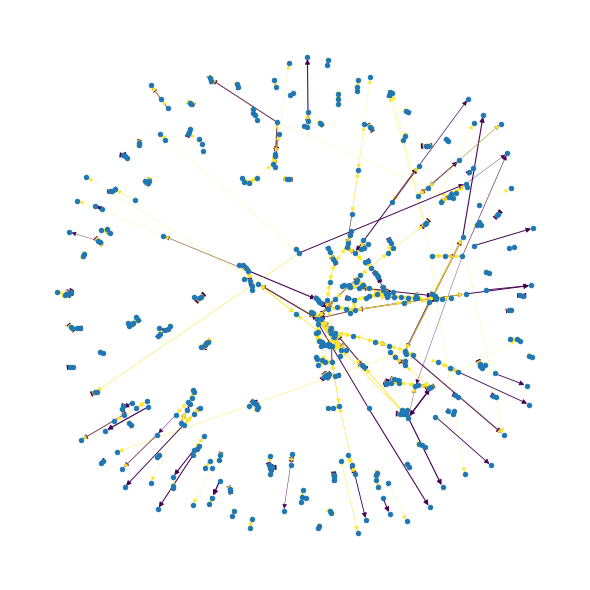

In [74]:
plt.figure(figsize=(8, 8))
nx.draw(
    G=G_cns_mobile_week1, 
    #pos=pos_cns_mobile_week1, 
    node_size=20, 
    width=[strength/5. for strength in list(nx.get_edge_attributes(G_cns_mobile_week1, 'weight').values())], 
    edge_color=[key for (u, v, key) in G_cns_mobile_week1.edges.keys()]
)

## 5.4. Sophisticated network drawing

The `draw()` method is not convincing for all purposes (e.g., multilayer networks). `draw()` is a so-called wrapper that calls multiple methods to draw nodes, links, and labels step by step. But the wrapper does not unlock the full potential of NetworkX. We will go beyond what the wrapper can do in the following steps. First, we want to influence they way nodes are positioned. There are a few layouting algorithms, and we start with **spring embedding**. From the NetworkX [documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html):

> The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

The result of such an algorithm is the placing of nodes in a usually 2-dimensional space where axes have no interpretable meaning. The spring embedder used in NetworkX by default was developed by Fruchterman and Reingold:

In [75]:
# https://stackoverflow.com/questions/14943439/how-to-draw-multigraph-in-networkx-using-matplotlib-or-graphviz

In [76]:
pos_cns_mobile_week1 = nx.spring_layout(G_cns_mobile_week1) # Same as nx.fruchterman_reingold_layout(G_cns_mobile_week1)

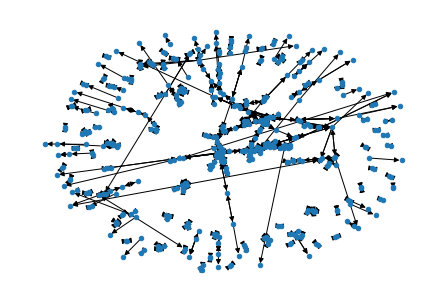

In [77]:
nx.draw(
    G=G_cns_mobile_week1, 
    pos=pos_cns_mobile_week1, 
    node_size=20
)

To move on with our discussion, we introduce the graph-theoretical concept of the [connected component](https://en.wikipedia.org/wiki/Component_(graph_theory)), a subgraph in which the nodes are reachable via edges. Since we are dealing with a directed graph, there are two kind of components. In a strongly connected component, all nodes are mutually reachable taking the direction of edges into account. In a weakly connected component, they are reachable not taking edge directions info account. NetworkX provides functions for [strong](https://networkx.org/documentation/stable/reference/algorithms/component.html#strong-connectivity) and [weak](https://networkx.org/documentation/stable/reference/algorithms/component.html#weak-connectivity) connectivity.

Since nodes repell each other, the spring embedder has a desirable result: Components are not drawn on top of each other. We see that the largest component is depicted in the center of the figure, and smaller components are drawn to the periphery. However, there are also many very long edges, and it is not clear to which component the belong. Hence, our first step is to only draw the largest component: the large weakly connected component in the center of the figure.

The whole graph is not weakly connected:

In [78]:
nx.is_weakly_connected(G_cns_mobile_week1)

False

There are that many weakly connected components:

In [79]:
nx.number_weakly_connected_components(G_cns_mobile_week1)

88

This is the ordered list of node sets that make up those components (the largest comes first):

In [80]:
l_wcc = sorted(nx.weakly_connected_components(G_cns_mobile_week1), key=len, reverse=True)
l_wcc

[{0,
  4,
  6,
  12,
  13,
  23,
  27,
  36,
  37,
  39,
  42,
  51,
  52,
  55,
  58,
  61,
  64,
  69,
  70,
  75,
  80,
  81,
  88,
  90,
  91,
  96,
  97,
  100,
  104,
  108,
  109,
  118,
  121,
  128,
  129,
  131,
  133,
  136,
  137,
  139,
  141,
  144,
  145,
  146,
  147,
  149,
  151,
  152,
  154,
  157,
  158,
  165,
  166,
  169,
  173,
  176,
  177,
  179,
  183,
  187,
  190,
  193,
  194,
  204,
  207,
  208,
  211,
  218,
  221,
  228,
  229,
  234,
  235,
  236,
  237,
  240,
  254,
  256,
  257,
  263,
  266,
  267,
  268,
  269,
  272,
  274,
  275,
  280,
  282,
  285,
  288,
  289,
  294,
  297,
  299,
  300,
  301,
  308,
  312,
  324,
  330,
  331,
  333,
  342,
  344,
  348,
  350,
  358,
  359,
  370,
  371,
  372,
  373,
  374,
  382,
  383,
  401,
  403,
  405,
  406,
  409,
  412,
  415,
  418,
  422,
  424,
  448,
  455,
  457,
  458,
  461,
  465,
  466,
  467,
  472,
  485,
  486,
  491,
  492,
  503,
  505,
  512,
  521,
  532,
  537,
  543,
  545,
 

We can extract the largest weakly connected component from the graph by using the `subgraph()` method on the original graph, extracting the first node set in the list:

In [81]:
G_cns_mobile_week1_lwcc = G_cns_mobile_week1.subgraph(l_wcc[0])

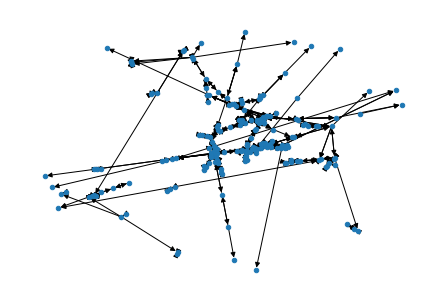

In [82]:
nx.draw(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1, 
    node_size=20
)

The [Fruchterman-Reingold algorithm](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) has a few parameters that we must know when layouting a graph. First of all, the `weight` of edges is assumed to be stored as an edge attribute called 'weight'. Since this is true in our case, we do not have to specify it manually (if you do not want to use edge weights, set `weight=None`). Parameter `k` can be changed to influence the distance between nodes. The number of `iterations` can be tuned when layouts have not converged yet to an equilibrium which can be the case when graphs are large. Finally, layouting can be initialized with an existing layout, specified by the `pos`parameter, to have visual continuity.

Now experiment with changing parameter settings:

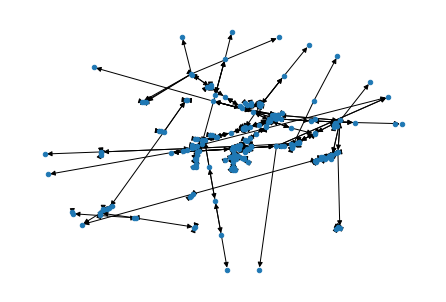

In [83]:
pos_cns_mobile_week1_lwcc = nx.spring_layout(
    G=G_cns_mobile_week1_lwcc, 
    k=None, # (default=None)
    pos=pos_cns_mobile_week1, # (default=None)
    iterations=50, # (default=50)
    weight='weight' # (default='weight')
)

nx.draw(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1_lwcc, 
    node_size=20
)

Are you also not quite happy with the result? Nodes in clusters tend to be placed on top of each other and there are some very long edge that confuse the whole picture. Let us try another standard layout algorithm. The [algorithm by Kamada and Kawai](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html) discards edge directions and places nodes far away from each other if they are connected by long sequences of edges, but it layouts component by component and stacks them all on top of each other:

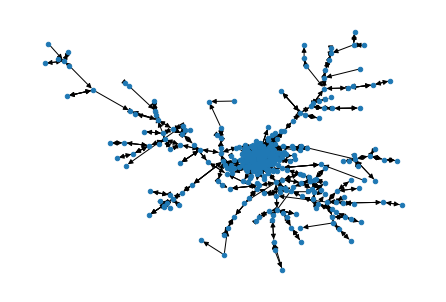

In [84]:
nx.draw(
    G=G_cns_mobile_week1, 
    pos=nx.kamada_kawai_layout(G_cns_mobile_week1), 
    node_size=20
)

Hence, we use the algorithm on the largest component. The algorithm hardly requires parameter tuning, although there are [options](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html).

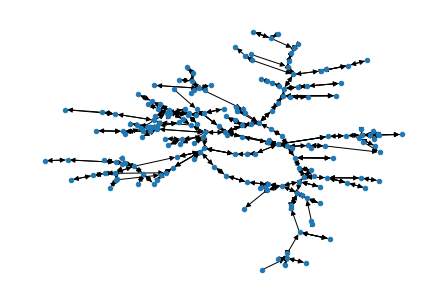

In [85]:
pos_cns_mobile_week1_lwcc = nx.kamada_kawai_layout(
    G=G_cns_mobile_week1_lwcc, 
    #pos=pos_cns_mobile_week1, # (default=None)
    weight='weight' # (default='weight')
)

nx.draw(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1_lwcc, 
    node_size=20
)

The layout uncovers that the largest component has a very stringy nature and that there are hardly any densely connected groups.

IMPROVE THE FOLLOWING LAYOUT -- PARALLEL EDGES SHOULD NOT BE PLACED ON TOP OF EACH OTHER, USE SPECIFIABLE COLORS FOR DIFFERENT EDGE KEYS, DISPLAY EDGE WIDTH BY WEIGHT, NOTE THE URL(S) THAT GAVE THE ANSWER(S):

https://stackoverflow.com/questions/60067022/multidigraph-edges-from-networkx-draw-with-connectionstyle

https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx

https://stackoverflow.com/questions/14943439/how-to-draw-multigraph-in-networkx-using-matplotlib-or-graphviz

...

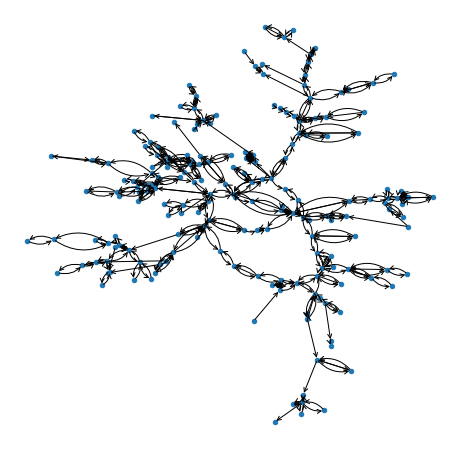

In [86]:
plt.figure(figsize=(8, 8))
# Draw nodes
nx.draw_networkx_nodes(
    G=G_cns_mobile_week1_lwcc, 
    pos=pos_cns_mobile_week1_lwcc, 
    node_size=20, 
    #node_color='black', 
    #node_shape='o'
)
## Draw edges
#nx.draw_networkx_edges(
#    G=G_cns_mobile_week1_lwcc, 
#    pos=pos_cns_mobile_week1_lwcc, 
#    width=[strength/5. for strength in list(nx.get_edge_attributes(G_cns_mobile_week1, 'weight').values())], 
#    edge_color=[key for (u, v, key) in G_cns_mobile_week1.edges.keys()], 
#    connectionstyle='arc3, rad=.1'
#)
ax = plt.gca()
for e in G_cns_mobile_week1_lwcc.edges:
    ax.annotate(
        '', 
        xy=pos_cns_mobile_week1_lwcc[e[0]], 
        #xycoords='data', 
        xytext=pos_cns_mobile_week1_lwcc[e[1]], 
        #textcoords='data', 
        arrowprops=dict(
            arrowstyle='->', 
            #color='gray', 
            #shrinkA=5, 
            #shrinkB=5, 
            patchA=None, 
            patchB=None, 
            connectionstyle='arc3, rad=rrr'.replace('rrr', str(0.3*e[2]))
        )
    )
## Label nodes
#nx.draw_networkx_labels(
#    G=G_cns_mobile_week1_lwcc, 
#    pos=pos_cns_mobile_week1_lwcc, 
#    font_color='black'
#)
plt.axis('off') # Toggle off box around figure
plt.show() # ...

USE DEGREE AS NODE AND FONT SIZE

https://stackoverflow.com/questions/62649745/is-it-possible-to-change-font-sizes-according-to-node-sizes

## 5.5. Multimodal networks

Multimodal ... rich data ...

Matrix multiplication

### 5.5.1. Bipartite networks and their projections

https://doi.org/10.1093/sf/53.2.181

...

In [87]:
matrix_davis = pd.DataFrame(
    data=[
        [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
        [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], 
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], 
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], 
        [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], 
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 
        [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], 
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], 
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], 
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], 
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 
        [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
        [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
        [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]
    ], 
    index=['Eleanor', 'Brenda', 'Dorothy', 'Verne', 'Flora', 'Olivia', 'Laura', 'Evelyn', 'Pearl', 'Ruth', 'Sylvia', 'Katherine', 'Myrna', 'Theresa', 'Charlotte', 'Frances', 'Helen', 'Nora'], 
    columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
)

The `from_pandas_adjacency()` function is made for adjacency matrices, not for bipartite matrices. We must transform the matrix into an edgelist first, then use the `from_pandas_edgelist()` function:

In [88]:
#matrix_davis = matrix_davis/matrix_davis.sum(axis=0) # Do column normalization
edgelist_davis = matrix_davis.stack().reset_index() # transform to edgelist
edgelist_davis = edgelist_davis[edgelist_davis[0] > 0].reset_index(drop=True) # remove zero relations
#edgelist_davis.drop(labels=0, axis=1, inplace=True) # drop edge weight column
edgelist_davis.columns = ['woman', 'event', 'weight'] # rename columns
edgelist_davis

,woman,event,weight
0,Eleanor,2,1
1,Eleanor,4,1
2,Eleanor,8,1
3,Eleanor,12,1
4,Brenda,2,1
...,...,...,...
84,Nora,6,1
85,Nora,8,1
86,Nora,9,1
87,Nora,11,1


In [89]:
G_davis = nx.from_pandas_edgelist(df=edgelist_davis, source='woman', target='event')

In [90]:
nx.is_bipartite(G_davis)

True

To distinguish between the two node types and to project the bipartite to either unipartite network, we must identify the two sets:

In [91]:
nodes_women = list(nx.bipartite.sets(G_davis)[0])
print('Women:', nodes_women)
nodes_events = list(nx.bipartite.sets(G_davis)[1])
print('Events:', nodes_events)

Women: ['Ruth', 'Laura', 'Helen', 'Nora', 'Charlotte', 'Brenda', 'Myrna', 'Flora', 'Pearl', 'Evelyn', 'Olivia', 'Sylvia', 'Frances', 'Eleanor', 'Katherine', 'Dorothy', 'Verne', 'Theresa']
Events: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


When the bipartite network is not connected in one component, the two modes cannot be identified from the data. In that case, we can work with the matrix index and columns:

In [92]:
nodes_women = matrix_davis.index.tolist()
print('Women:', nodes_women)
nodes_events = matrix_davis.columns.tolist()
print('Events:', nodes_events)

Women: ['Eleanor', 'Brenda', 'Dorothy', 'Verne', 'Flora', 'Olivia', 'Laura', 'Evelyn', 'Pearl', 'Ruth', 'Sylvia', 'Katherine', 'Myrna', 'Theresa', 'Charlotte', 'Frances', 'Helen', 'Nora']
Events: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


Draw the bipartite network:

In [93]:
pos_bipartite = nx.bipartite_layout(G_davis, nodes_women)

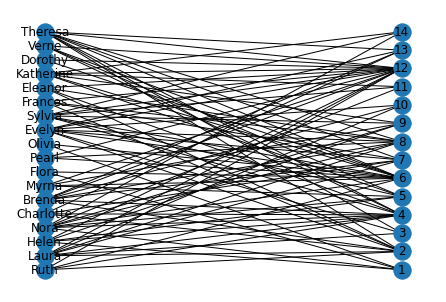

In [94]:
nx.draw(G=G_davis, pos=pos_bipartite, with_labels=True)

The result is not quite satisfying. For example, we want to give the nodes of the two modes different colors, shapes, and font colors. To do this, we must again interact with Matplotlib directly.

As node size, we want to display the number of events per woman and the number of women per event, respectively. To obtain these numbersr, we can simply use the column and row sums of the matrix:

In [95]:
d_sizes_women = matrix_davis.sum(axis=1).to_dict()
print('Women:', d_sizes_women)
d_sizes_events = matrix_davis.sum(axis=0).to_dict()
print('Events:', d_sizes_events)

Women: {'Eleanor': 4, 'Brenda': 7, 'Dorothy': 2, 'Verne': 4, 'Flora': 2, 'Olivia': 2, 'Laura': 7, 'Evelyn': 8, 'Pearl': 3, 'Ruth': 4, 'Sylvia': 7, 'Katherine': 6, 'Myrna': 4, 'Theresa': 8, 'Charlotte': 4, 'Frances': 4, 'Helen': 5, 'Nora': 8}
Events: {1: 4, 2: 8, 3: 3, 4: 10, 5: 6, 6: 12, 7: 6, 8: 8, 9: 5, 10: 3, 11: 3, 12: 14, 13: 4, 14: 3}


To use mode-specific font colors, we must prepare two dictionaries that map node labels (dictionary values) to node identifiers (dictionary keys). Recall that in NetworkX node identifiers are node labels by default:

In [96]:
labels_women = {woman: woman for woman in nodes_women}
print('Women:', labels_women)
labels_event = {event: event for event in nodes_events}
print('Events:', labels_event)

Women: {'Eleanor': 'Eleanor', 'Brenda': 'Brenda', 'Dorothy': 'Dorothy', 'Verne': 'Verne', 'Flora': 'Flora', 'Olivia': 'Olivia', 'Laura': 'Laura', 'Evelyn': 'Evelyn', 'Pearl': 'Pearl', 'Ruth': 'Ruth', 'Sylvia': 'Sylvia', 'Katherine': 'Katherine', 'Myrna': 'Myrna', 'Theresa': 'Theresa', 'Charlotte': 'Charlotte', 'Frances': 'Frances', 'Helen': 'Helen', 'Nora': 'Nora'}
Events: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14}


Now we have everything in place to draw a network that transports more information:

In [97]:
pos_bipartite = nx.fruchterman_reingold_layout(G_davis)

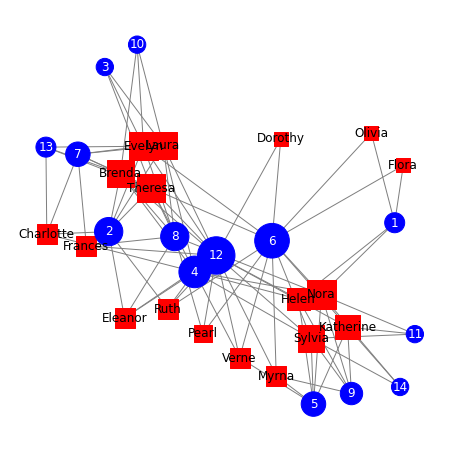

In [98]:
plt.figure(figsize=(8, 8))
# Draw woman nodes as red squares with the number of events as node size
nx.draw_networkx_nodes(
    G=G_davis, 
    pos=pos_bipartite, 
    nodelist=nodes_women, 
    node_size=[100*values for keys, values in d_sizes_women.items()], # Using list comprehension to increase node size
    node_color='red', 
    node_shape='s'
)
# Draw event nodes as blue circles with the number of women as node size
nx.draw_networkx_nodes(
    G=G_davis, 
    pos=pos_bipartite, 
    nodelist=nodes_events, 
    node_size=[100*values for keys, values in d_sizes_events.items()], 
    node_color='blue', 
    node_shape='o'
)
# Draw edges in gray
nx.draw_networkx_edges(
    G=G_davis, 
    pos=pos_bipartite, 
    edge_color='gray'
)
# Label women nodes in black
nx.draw_networkx_labels(
    G=G_davis, 
    pos=pos_bipartite, 
    labels=labels_women, 
    font_color='black'
)
# Label event nodes in white
nx.draw_networkx_labels(
    G=G_davis, 
    pos=pos_bipartite, 
    labels=labels_event, 
    font_color='white'
)
plt.axis('off')
plt.show()

To also change font size: https://stackoverflow.com/questions/62649745/is-it-possible-to-change-font-sizes-according-to-node-sizes

#### Projection

In [99]:
G_davis_women = nx.bipartite.weighted_projected_graph(G_davis, nodes_women)

In [100]:
##plt.figure(figsize=(8, 8))
#nx.draw(
#    G=G_davis_women, 
#    pos=pos_bipartite, 
#    with_labels=True, 
#    node_size=[50*values for keys, values in d_sizes_women.items()], 
#    node_color='red', 
#    node_shape='s', 
#    width=list(nx.get_edge_attributes(G_davis_women, 'weight').values()), 
#    edge_color='gray', 
#    font_color='black'
#)

In [101]:
nx.to_pandas_adjacency(G_davis_women)

,Eleanor,Brenda,Dorothy,Verne,Flora,Olivia,Laura,Evelyn,Pearl,Ruth,Sylvia,Katherine,Myrna,Theresa,Charlotte,Frances,Helen,Nora
Eleanor,0.0,4.0,1.0,2.0,0.0,0.0,4.0,3.0,2.0,3.0,2.0,1.0,1.0,4.0,2.0,3.0,2.0,2.0
Brenda,4.0,0.0,1.0,2.0,0.0,0.0,6.0,6.0,2.0,3.0,2.0,1.0,1.0,6.0,4.0,4.0,2.0,2.0
Dorothy,1.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0
Verne,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0
Flora,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
Olivia,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
Laura,4.0,6.0,1.0,2.0,0.0,0.0,0.0,6.0,2.0,3.0,2.0,1.0,1.0,6.0,3.0,4.0,2.0,2.0
Evelyn,3.0,6.0,2.0,2.0,1.0,1.0,6.0,0.0,3.0,3.0,2.0,2.0,2.0,7.0,3.0,4.0,1.0,2.0
Pearl,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,3.0,0.0,2.0,1.0,2.0
Ruth,3.0,3.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,0.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0


Projection to the other side:

In [102]:
G_davis_events = nx.bipartite.weighted_projected_graph(G_davis, nodes_events)

In [103]:
##plt.figure(figsize=(8, 8))
#nx.draw(
#    G=G_davis_events, 
#    pos=pos_bipartite, 
#    with_labels=True, 
#    node_size=[50*values for keys, values in d_sizes_events.items()], 
#    node_color='blue', 
#    node_shape='o', 
#    width=list(nx.get_edge_attributes(G_davis_events, 'weight').values()), 
#    edge_color='gray', 
#    font_color='white'
#)

In [104]:
nx.to_pandas_adjacency(G_davis_events)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.0,0.0,0.0,2.0,2.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,3.0,6.0,0.0,3.0,6.0,6.0,0.0,3.0,0.0,7.0,4.0,0.0
3,0.0,3.0,0.0,2.0,0.0,2.0,3.0,3.0,0.0,2.0,0.0,3.0,2.0,0.0
4,2.0,6.0,2.0,0.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,8.0,3.0,2.0
5,2.0,0.0,0.0,4.0,0.0,5.0,0.0,1.0,5.0,0.0,3.0,5.0,0.0,3.0
6,3.0,3.0,2.0,5.0,5.0,0.0,2.0,4.0,4.0,1.0,3.0,9.0,2.0,3.0
7,0.0,6.0,3.0,4.0,0.0,2.0,0.0,5.0,0.0,3.0,0.0,5.0,4.0,0.0
8,1.0,6.0,3.0,5.0,1.0,4.0,5.0,0.0,1.0,3.0,1.0,7.0,3.0,1.0
9,2.0,0.0,0.0,3.0,5.0,4.0,0.0,1.0,0.0,0.0,3.0,4.0,0.0,3.0
10,0.0,3.0,2.0,2.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,0.0


In [105]:
import ipywidgets

In [106]:
def filter_edges(G, node_size, node_color, node_shape, font_color):
    '''
        Bla
    '''
    def draw_filtered_graph(weight_min):
        '''
            Bla
        '''
        G_filter = nx.Graph()
        G_filter.add_nodes_from(G.nodes)
        G_filter.add_edges_from([(u, v, edge_attr) for u, v, edge_attr in G.edges(data=True) if edge_attr['weight'] >= weight_min])
        #plt.figure(figsize=(8, 8))
        nx.draw(
            G=G_filter, 
            pos=pos_bipartite, 
            with_labels=True, 
            node_size=node_size, 
            node_color=node_color, 
            node_shape=node_shape, 
            width=list(nx.get_edge_attributes(G_filter, 'weight').values()), 
            edge_color='gray', 
            font_color=font_color
        )
    ipywidgets.interact(
        draw_filtered_graph, 
        weight_min=ipywidgets.IntSlider(value=1, min=1, max=7, step=1)
    )

In [107]:
filter_edges(
    G=G_davis_women, 
    node_size=[50*values for keys, values in d_sizes_women.items()], 
    node_color='red', 
    node_shape='s', 
    font_color='black'
)

interactive(children=(IntSlider(value=1, description='weight_min', max=7, min=1), Output()), _dom_classes=('wi…

In [108]:
filter_edges(
    G=G_davis_events, 
    node_size=[50*values for keys, values in d_sizes_events.items()], 
    node_color='blue', 
    node_shape='o', 
    font_color='white'
)

interactive(children=(IntSlider(value=1, description='weight_min', max=7, min=1), Output()), _dom_classes=('wi…

### 5.5.2. Matrix multiplication

NetworkX is slow when networks are large. It is then useful to handle matrices in SciPy before loading them into NetworkX.

Work with edgelists (long data format)

...

REPLICATE ABOVE RESULTS USING SciPy

...

In [109]:
edgelist_davis['woman'].dtype

dtype('O')

In [110]:
edgelist_davis['woman'] = edgelist_davis['woman'].astype('category')
edgelist_davis['event'] = edgelist_davis['event'].astype('category')

In [111]:
women = pd.DataFrame(edgelist_davis['woman'].cat.categories, columns=['woman'])
events = pd.DataFrame(edgelist_davis['event'].cat.categories, columns=['event'])

In [112]:
women.head()

,woman
0,Brenda
1,Charlotte
2,Dorothy
3,Eleanor
4,Evelyn


Create a new edgelist using integers representing categories:

In [113]:
edgelist_davis_int = edgelist_davis.copy()

In [114]:
edgelist_davis_int['woman'] = edgelist_davis_int['woman'].cat.codes
edgelist_davis_int['event'] = edgelist_davis_int['event'].cat.codes

In [115]:
edgelist_davis_int.head()

,woman,event,weight
0,3,1,1
1,3,3,1
2,3,7,1
3,3,11,1
4,0,1,1


In [116]:
from scipy.sparse import coo_matrix, triu, diags

In [117]:
m_davis = coo_matrix((
    edgelist_davis_int['weight'].tolist(), 
    (edgelist_davis_int['woman'].tolist(), edgelist_davis_int['event'].tolist()))
)

The transpose...

In [118]:
mt_davis = coo_matrix.transpose(m_davis)

**Projection**

In [119]:
m_davis_women = m_davis*mt_davis
m_davis_events = mt_davis*m_davis

Since links are undirected, remove the redundant part of matrix:

In [120]:
m_davis_women = triu(m_davis_women)
m_davis_events = triu(m_davis_events)

The diagonals in these matrices contain the number of events per woman and the number of women per event, respectively. Save those values in a list:

In [121]:
l_sizes_women = list(m_davis_women.diagonal())
l_sizes_events = list(m_davis_events.diagonal())

Diagonals will be drawn as self-loops. To not draw them, we must remove them from the matrix:

In [122]:
m_davis_women.setdiag(values=0)
m_davis_events.setdiag(values=0)
m_davis_women.eliminate_zeros()
m_davis_events.eliminate_zeros()

To edgelist:

In [123]:
edgelist_davis_women = pd.concat([
    pd.Series(m_davis_women.nonzero()[0]), 
    pd.Series(m_davis_women.nonzero()[1]), 
    pd.Series(m_davis_women.data)
], axis=1)
edgelist_davis_events = pd.concat([
    pd.Series(m_davis_events.nonzero()[0]), 
    pd.Series(m_davis_events.nonzero()[1]), 
    pd.Series(m_davis_events.data)
], axis=1)
edgelist_davis_women.columns = ['source', 'target', 'weight']
edgelist_davis_events.columns = ['source', 'target', 'weight']

<div class='alert alert-info'>
<big><b>Insight</b></big>

THESE EDGELISTS CAN BE FILTERED EFFICIENTLY. IF WE OUTSOURCE MATRIX MAULTIPLICATION AND FILTERING FROM NX, WE CAN PROCESS FAIRLY LARGE NETWORKS.
</div>

From these edgelists, we can now generate the same network as constructed using the NetworkX functions for projecting bipartite networks:

In [124]:
M_davis_women = nx.from_pandas_edgelist(
    df=edgelist_davis_women, 
    source='source', 
    target='target', 
    edge_attr=['weight']
)
M_davis_events = nx.from_pandas_edgelist(
    df=edgelist_davis_events, 
    source='source', 
    target='target', 
    edge_attr=['weight']
)

In [125]:
M_davis_women.nodes()

NodeView((0, 10, 8, 2, 13, 17, 15, 11, 7, 16, 14, 9, 6, 4, 3, 1, 12, 5))

Since SciPy uses integers starting at zero for both women and events, the resulting networks also have those integers as labels. For this reason, we cannot use the dictionary of node positions directly. Extract node positions from `pos_bipartite` using dictionary comprehension, drawing node identifiers from the relevant nodelist:

In [126]:
pos_women = {women[women['woman'] == key].index[0]: value for (key, value) in pos_bipartite.items() if type(key) == str}
pos_events = {events[events['event'] == key].index[0]: value for (key, value) in pos_bipartite.items() if type(key) == int}

Since the order of nodes has also changed, we must not use the node sizes stored in the `d_sizes_...` dictionaries. Instead we must use the lists extracted from the matrix diagonals which correctly match the nodes. Finally, we must draw nodes, edges, and node labels separately because the latter are external to the graph object:

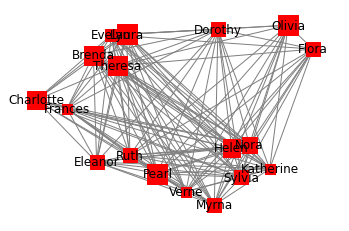

In [127]:
#plt.figure(figsize=(8, 8))
# Draw woman nodes as red squares with the number of events as node size
nx.draw_networkx_nodes(
    G=M_davis_women, 
    pos=pos_women, 
    node_size=[50*size for size in l_sizes_women], 
    node_color='red', 
    node_shape='s'
)
# Draw edges in gray
nx.draw_networkx_edges(
    G=M_davis_women, 
    pos=pos_women, 
    edge_color='gray'
)
# Label women nodes in black
nx.draw_networkx_labels(
    G=M_davis_women, 
    pos=pos_women, 
    labels=women['woman'], 
    font_color='black'
)
plt.axis('off')
plt.show()

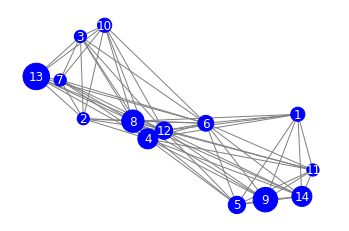

In [128]:
#plt.figure(figsize=(8, 8))
# Draw event nodes as blue circles with the number of women as node size
nx.draw_networkx_nodes(
    G=M_davis_events, 
    pos=pos_events, 
    node_size=[50*size for size in l_sizes_events], 
    node_color='blue', 
    node_shape='o'
)
# Draw edges in gray
nx.draw_networkx_edges(
    G=M_davis_events, 
    pos=pos_events, 
    edge_color='gray'
)
# Label event nodes in white
nx.draw_networkx_labels(
    G=M_davis_events, 
    pos=pos_events, 
    labels=events['event'], 
    font_color='white'
)
plt.axis('off')
plt.show()

**Normalization**

https://doi.org/10.1007/s11192-012-0940-1

For example, how similar are women regarding their event participation? To answer this question, we apply row normalization on the bipartite matrix. Row normalization means that row values sum to one, that is, each event participation is weighted by the inverse number of events a woman participated in. In other words, the fewer events a woman participates in, the "stronger" she participates in the events.

In [129]:
from sklearn.preprocessing import normalize

In [130]:
mrn_davis = normalize(m_davis, norm='l1', axis=1)

In [131]:
mrnt_davis = mrn_davis.transpose()

In [132]:
ms_davis_women = mrn_davis*mrnt_davis

In [133]:
similarity_davis_women = pd.DataFrame(ms_davis_women.toarray(), index=women['woman'].tolist(), columns=women['woman'].tolist())

In [134]:
similarity_davis_women.style.apply(lambda x: ['background: yellow' if s == similarity_davis_women.max().max() else '' for s in x], axis = 1)

,Brenda,Charlotte,Dorothy,Eleanor,Evelyn,Flora,Frances,Helen,Katherine,Laura,Myrna,Nora,Olivia,Pearl,Ruth,Sylvia,Theresa,Verne
Brenda,0.142857,0.142857,0.071429,0.142857,0.107143,0.000000,0.142857,0.057143,0.023810,0.122449,0.035714,0.035714,0.000000,0.095238,0.107143,0.040816,0.107143,0.071429
Charlotte,0.142857,0.250000,0.000000,0.125000,0.093750,0.000000,0.125000,0.050000,0.000000,0.107143,0.000000,0.031250,0.000000,0.000000,0.125000,0.035714,0.125000,0.062500
Dorothy,0.071429,0.000000,0.500000,0.125000,0.125000,0.250000,0.125000,0.100000,0.166667,0.071429,0.250000,0.062500,0.250000,0.333333,0.250000,0.142857,0.125000,0.250000
Eleanor,0.142857,0.125000,0.125000,0.250000,0.093750,0.000000,0.187500,0.100000,0.041667,0.142857,0.062500,0.062500,0.000000,0.166667,0.187500,0.071429,0.125000,0.125000
Evelyn,0.107143,0.093750,0.125000,0.093750,0.125000,0.062500,0.125000,0.025000,0.041667,0.107143,0.062500,0.031250,0.062500,0.125000,0.093750,0.035714,0.109375,0.062500
Flora,0.000000,0.000000,0.250000,0.000000,0.062500,0.500000,0.000000,0.100000,0.083333,0.000000,0.125000,0.125000,0.500000,0.166667,0.125000,0.071429,0.062500,0.125000
Frances,0.142857,0.125000,0.125000,0.187500,0.125000,0.000000,0.250000,0.050000,0.041667,0.142857,0.062500,0.031250,0.000000,0.166667,0.125000,0.035714,0.125000,0.062500
Helen,0.057143,0.050000,0.100000,0.100000,0.025000,0.100000,0.050000,0.200000,0.100000,0.057143,0.150000,0.100000,0.100000,0.066667,0.100000,0.114286,0.050000,0.150000
Katherine,0.023810,0.000000,0.166667,0.041667,0.041667,0.083333,0.041667,0.100000,0.166667,0.023810,0.166667,0.104167,0.083333,0.111111,0.083333,0.142857,0.041667,0.125000
Laura,0.122449,0.107143,0.071429,0.142857,0.107143,0.000000,0.142857,0.057143,0.023810,0.142857,0.035714,0.035714,0.000000,0.095238,0.107143,0.040816,0.107143,0.071429


Conversely, to learn how similar events are regarding participating women, we apply column normalization and proceed accordingly:

In [135]:
mcn_davis = normalize(m_davis, norm='l1', axis=0)

In [136]:
mcnt_davis = mcn_davis.transpose()

In [137]:
ms_davis_events = mcnt_davis*mcn_davis

In [138]:
similarity_davis_events = pd.DataFrame(ms_davis_events.toarray(), index=events['event'].tolist(), columns=events['event'].tolist())

In [139]:
similarity_davis_events.style.apply(lambda x: ['background: yellow' if s == similarity_davis_events.max().max() else '' for s in x], axis = 1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.250000,0.000000,0.000000,0.050000,0.083333,0.062500,0.000000,0.031250,0.100000,0.000000,0.083333,0.017857,0.000000,0.083333
2,0.000000,0.125000,0.125000,0.075000,0.000000,0.031250,0.125000,0.093750,0.000000,0.125000,0.000000,0.062500,0.125000,0.000000
3,0.000000,0.125000,0.333333,0.066667,0.000000,0.055556,0.166667,0.125000,0.000000,0.222222,0.000000,0.071429,0.166667,0.000000
4,0.050000,0.075000,0.066667,0.100000,0.066667,0.041667,0.066667,0.062500,0.060000,0.066667,0.066667,0.057143,0.075000,0.066667
5,0.083333,0.000000,0.000000,0.066667,0.166667,0.069444,0.000000,0.020833,0.166667,0.000000,0.166667,0.059524,0.000000,0.166667
6,0.062500,0.031250,0.055556,0.041667,0.069444,0.083333,0.027778,0.041667,0.066667,0.027778,0.083333,0.053571,0.041667,0.083333
7,0.000000,0.125000,0.166667,0.066667,0.000000,0.027778,0.166667,0.104167,0.000000,0.166667,0.000000,0.059524,0.166667,0.000000
8,0.031250,0.093750,0.125000,0.062500,0.020833,0.041667,0.104167,0.125000,0.025000,0.125000,0.041667,0.062500,0.093750,0.041667
9,0.100000,0.000000,0.000000,0.060000,0.166667,0.066667,0.000000,0.025000,0.200000,0.000000,0.200000,0.057143,0.000000,0.200000
10,0.000000,0.125000,0.222222,0.066667,0.000000,0.027778,0.166667,0.125000,0.000000,0.333333,0.000000,0.071429,0.166667,0.000000


More complicated algebraic operations

...

Such as closing triangles ... also Breiger's paper

...

https://doi.org/10.1016/j.poetic.2018.01.001

...